# **BUSINESS CASE: STATISTICS MODULE PROJECT**

# **MATRICULA: A01706328**
# **NOMBRE: KEVIN JOAN DELGADO PÉREZ**

In [150]:
from google.colab import drive

drive.mount("/content/drive")  
!pwd  # show current path 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/IA_data_sets/Bloque1/Statistics_businessCases


In [3]:
%cd "/content/drive/MyDrive/IA_data_sets/Bloque1/Statistics_businessCases"
!ls  # show current directory

/content/drive/MyDrive/IA_data_sets/Bloque1/Statistics_businessCases
us2022q2a.csv  usfirms2022.csv


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [5]:
df = pd.read_csv('us2022q2a.csv')

In [6]:
sns.set(rc={"figure.figsize": (14,8)})

In [7]:
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324447 entries, 0 to 324446
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   firm               324446 non-null  object 
 1   q                  324446 non-null  object 
 2   revenue            158614 non-null  float64
 3   cogs               158309 non-null  float64
 4   sgae               158309 non-null  float64
 5   otheropexp         158311 non-null  float64
 6   extraincome        158613 non-null  float64
 7   finexp             158614 non-null  float64
 8   incometax          158614 non-null  float64
 9   totalassets        159808 non-null  float64
 10  totalliabilities   159808 non-null  float64
 11  shortdebt          129677 non-null  float64
 12  longdebt           159595 non-null  float64
 13  stockholderequity  159740 non-null  float64
 14  adjprice           159154 non-null  float64
 15  originalprice      159234 non-null  float64
 16  sh

Variable calculations:


    - firm size measure: 
          * Book value of the firm = (totalassets-totalalliabilities)
          * Market value = (historical stock price x # of shares) = (original price x sharesoutstanding)

    - Profit margin measures:
          * operating profit margin = operating profit/sales
                -. operating profit = (revenue - cogs - sgae)
                      -- Cost = cost of good sold = variable cost
                      -- sgae = Sales and general administrative expenses = fixed costs
                .- Ebit = earnings before interst and taxes = operating profit
                .- formula: ebit = revenue - cogs - sgae - otheropexp
                    -- otheropexp = other operating expenses
                - profit margin = pm = ebit/revenue

    - profit margin = net income / sales
          * Net income  = ebit - incometax - fine exp + extraincome
          * Income tax = what the firm pays in taxes (for the government (impuesto sobre la renta))
          * finexp = financial expenses = what the firm pays in interest expenses for any lon that the firm issued
          * EPS = Netincome/shareoutstanding
          * ESPS = (Netincome/shareoutstanding)/originalprice


      *** Notes: ALL NUMERIC MONEY VARIABLES ARE IN THOUSAND OF US DOLLARS


#  Converting the data frame to the most recent year of the data set (the last 4 quarters)

In [9]:
df_ly = df.query("q >= '2021q3' and q <='2022q2'")
df_ly

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
86,A,2021q3,1586000.0,734000.0,516000.0000,0.0,12000.000000,21000.000,63000.0,1.049100e+07,5545000.000,130000.000,2728000.000,4946000.000,156.603447,157.53,302722.668,9.0,2021.0,3.0
87,A,2021q4,1660000.0,760000.0,505000.0000,0.0,73000.000000,20000.000,6000.0,1.070500e+07,5316000.000,0.000,2729000.000,5389000.000,158.908608,159.65,302000.797,12.0,2021.0,4.0
88,A,2022q1,1674000.0,764000.0,534000.0000,0.0,-37000.000000,20000.000,36000.0,1.032700e+07,5173000.000,0.000,2730000.000,5154000.000,131.888962,132.33,300113.377,3.0,2022.0,1.0
89,A,2022q2,1607000.0,746000.0,501000.0000,0.0,-7000.000000,20000.000,59000.0,1.045500e+07,5333000.000,175000.000,2730000.000,5122000.000,118.560000,118.77,298708.056,6.0,2022.0,2.0
176,AA,2021q3,3109000.0,2322000.0,217000.0000,33000.0,-15000.000000,58000.000,127000.0,1.419700e+07,8736000.000,1000.000,1724000.000,5461000.000,48.597527,48.94,186866.156,9.0,2021.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324355,ZY,2022q2,2634.0,9732.0,58638.0000,40460.0,-885.000000,9376.000,11.0,4.709680e+05,234345.000,7900.000,178181.000,236623.000,1.230000,1.23,103140.755,6.0,2022.0,2.0
324442,ZYNE,2021q3,0.0,0.0,10210.6520,0.0,-376.636750,-5.038,0.0,8.999617e+04,11309.171,207.635,411.237,78686.999,4.240000,4.24,41251.537,9.0,2021.0,3.0
324443,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,8.117151e+04,10258.173,209.068,353.694,70913.334,2.880000,2.88,41217.537,12.0,2021.0,4.0
324444,ZYNE,2022q1,0.0,0.0,8903.9150,0.0,317.252110,-96.044,0.0,7.438103e+04,9214.059,210.512,295.754,65166.970,2.050000,2.05,42447.037,3.0,2022.0,1.0


# Converting the data frame to the most recent quarter of the dataset (2022q2)

In [10]:
df_lq = df.query("q >= '2022q2' and q <='2022q2'")
df_lq

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
89,A,2022q2,1607000.0,746000.0,5.010000e+05,0.0,-7000.00000,20000.000,59000.0,1.045500e+07,5.333000e+06,175000.000,2.730000e+06,5122000.000,118.560000,118.7700,298708.056,6.0,2022.0,2.0
179,AA,2022q2,3644000.0,2767000.0,2.200000e+05,-75000.0,81000.00000,30000.000,234000.0,1.570900e+07,8.417000e+06,1000.000,1.725000e+06,7292000.000,45.487956,45.5800,184448.686,6.0,2022.0,2.0
269,AAIC,2022q2,10900.0,6374.0,0.000000e+00,0.0,-3417.00000,0.000,802.0,1.084755e+06,8.710570e+05,NaN,2.089690e+05,213698.000,3.250000,3.2500,35016.392,6.0,2022.0,2.0
359,AAL,2022q2,13422000.0,0.0,1.240500e+07,0.0,25000.00000,439000.000,127000.0,6.796300e+07,7.638500e+07,2106000.000,3.496300e+07,-8422000.000,12.680000,12.6800,649514.848,6.0,2022.0,2.0
449,AAME,2022q2,44669.0,0.0,4.678400e+04,0.0,0.00000,0.000,-436.0,3.792740e+05,2.701730e+05,NaN,3.373800e+04,109101.000,2.670000,2.6700,20398.497,6.0,2022.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324085,ZVIA,2022q2,45542.0,28168.0,2.407400e+04,8043.0,3662.00000,0.000,9.0,1.127380e+05,2.553900e+04,685.000,3.680000e+02,87199.000,2.810000,2.8100,67209.461,6.0,2022.0,2.0
324175,ZVO,2022q2,51380.0,34995.0,2.610800e+04,-8882.0,-3824.00000,0.000,8.0,8.543300e+04,7.882800e+04,0.000,0.000000e+00,6605.000,0.970100,0.9701,34095.968,6.0,2022.0,2.0
324265,ZWS,2022q2,284200.0,170400.0,6.000000e+04,300.0,-600.00000,5200.000,11300.0,1.176300e+06,9.469000e+05,5600.000,5.378000e+05,229400.000,27.179735,27.2400,125967.533,6.0,2022.0,2.0
324355,ZY,2022q2,2634.0,9732.0,5.863800e+04,40460.0,-885.00000,9376.000,11.0,4.709680e+05,2.343450e+05,7900.000,1.781810e+05,236623.000,1.230000,1.2300,103140.755,6.0,2022.0,2.0


# **NOTE: FOR THE DESCRIPTIVE STATISTICS ANDO MOST OF THE CALCULATIONS I WILL USE THE ANALYSIS OF THE ROLLING YEAR**

# DOING THE ANALYSIS OF THE LAST YEAR AND USING DATA MANAGEMENT TO ADAPT THE DATA

**First, separate the colums to use only the last amount because they are acumulatives values**

In [11]:
df_lytosum = df_ly[['firm','revenue','cogs','sgae','otheropexp','finexp','incometax']]
df_lytosum

,firm,revenue,cogs,sgae,otheropexp,finexp,incometax
86,A,1586000.0,734000.0,516000.0000,0.0,21000.000,63000.0
87,A,1660000.0,760000.0,505000.0000,0.0,20000.000,6000.0
88,A,1674000.0,764000.0,534000.0000,0.0,20000.000,36000.0
89,A,1607000.0,746000.0,501000.0000,0.0,20000.000,59000.0
176,AA,3109000.0,2322000.0,217000.0000,33000.0,58000.000,127000.0
...,...,...,...,...,...,...,...
324355,ZY,2634.0,9732.0,58638.0000,40460.0,9376.000,11.0
324442,ZYNE,0.0,0.0,10210.6520,0.0,-5.038,0.0
324443,ZYNE,0.0,0.0,8836.4365,0.0,-4.433,0.0
324444,ZYNE,0.0,0.0,8903.9150,0.0,-96.044,0.0


**Then, I grouped the dataframe by the same firm, adding the amounts obtained according to the quarters**

In [12]:
df_lytosum = df_lytosum.groupby('firm').sum()
df_lytosum

,revenue,cogs,sgae,otheropexp,finexp,incometax
firm,,,,,,
A,6527000.0,3004000.0,2.056000e+06,0.0,81000.000,164000.0
AA,13386000.0,9653000.0,8.930000e+05,1138000.0,141000.000,869000.0
AAIC,31855.0,15523.0,0.000000e+00,0.0,0.000,4333.0
AAL,40717000.0,0.0,4.160800e+07,0.0,1828000.000,-546000.0
AAME,195299.0,0.0,1.915230e+05,0.0,0.000,863.0
...,...,...,...,...,...,...
ZVIA,156702.0,93921.0,8.744600e+04,94595.0,0.000,55.0
ZVO,230001.0,149303.0,1.118000e+05,5753.0,0.000,98.0
ZWS,340300.0,195100.0,1.196000e+05,3400.0,22000.000,-13700.0


**Later, I separated the another part of the data frame by the columns about the total information**

In [13]:
df_lylastq = df_lq[['firm','totalassets','totalliabilities','shortdebt','longdebt','stockholderequity','adjprice','originalprice','sharesoutstanding']]
df_lylastq

,firm,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding
89,A,1.045500e+07,5.333000e+06,175000.000,2.730000e+06,5122000.000,118.560000,118.7700,298708.056
179,AA,1.570900e+07,8.417000e+06,1000.000,1.725000e+06,7292000.000,45.487956,45.5800,184448.686
269,AAIC,1.084755e+06,8.710570e+05,NaN,2.089690e+05,213698.000,3.250000,3.2500,35016.392
359,AAL,6.796300e+07,7.638500e+07,2106000.000,3.496300e+07,-8422000.000,12.680000,12.6800,649514.848
449,AAME,3.792740e+05,2.701730e+05,NaN,3.373800e+04,109101.000,2.670000,2.6700,20398.497
...,...,...,...,...,...,...,...,...,...
324085,ZVIA,1.127380e+05,2.553900e+04,685.000,3.680000e+02,87199.000,2.810000,2.8100,67209.461
324175,ZVO,8.543300e+04,7.882800e+04,0.000,0.000000e+00,6605.000,0.970100,0.9701,34095.968
324265,ZWS,1.176300e+06,9.469000e+05,5600.000,5.378000e+05,229400.000,27.179735,27.2400,125967.533
324355,ZY,4.709680e+05,2.343450e+05,7900.000,1.781810e+05,236623.000,1.230000,1.2300,103140.755


Finally, I merge both tables and obtained the Rolling year dataframe for the analysis

In [14]:
df_rolly = df_lytosum.merge(df_lylastq, on='firm')

# **Merging Rolling Year Table**

**Another step is merge the rolling year table with the dataset of the firms and some extra details of information**

In [15]:
df_firms = pd.read_csv('usfirms2022.csv')

In [16]:
df_firms.rename(columns = {'Ticker':'firm','Sector NAICS\nlevel 1':'Industry'},inplace=True)
df_firms

,firm,Name,N,Class,Country\nof Origin,Type of Asset,Industry,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,FLWS,1 800 Flowers Com Inc,1,Com A,US,Stock,Retail Trade,NASDAQ,Trade,Retail Trade,-
1,TXG,"10x Genomics, Inc",2,Com A,US,Stock,Manufacturing,NASDAQ,Electric Electron,"Navigational, Measuring, Electromedical, and C...",-
2,GOED,1847 Goedeker Inc,3,Com,US,Stock,Retail Trade,AMEX,Trade,Furniture and Home Furnishings Stores,-
3,ONEM,"1life Healthcare, Inc",4,Com,US,Stock,Health Care and Social Assistance,NASDAQ,Other,Offices of Physicians,-
4,SRCE,1st Source Corp,5,Com,US,Stock,Finance and Insurance,NASDAQ,Finance and Insurance,Depository Credit Intermediation,-
...,...,...,...,...,...,...,...,...,...,...,...
3603,ZUO,"Zuora, Inc",3604,Com A,US,Stock,Information,NYSE,Software & Data,Software Publishers,-
3604,ZWS,Zurn Elkay Water Solutions Corp,3605,Com,US,Stock,Manufacturing,NYSE,Industrial Machin,Other General Purpose Machinery Manufacturing,-
3605,ZY,Zymergen Inc,3606,Com,US,Stock,"Professional, Scientific, and Technical Services",NASDAQ,Other,Scientific Research and Development Services,-
3606,ZYNE,"Zynerba Pharmaceuticals, Inc",3607,Com,US,Stock,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-


**Finally, I get the table with both dataframes, so the definitive data is ready to doing the analysis.**

In [17]:
df_rolly = df_rolly.merge(df_firms, on = 'firm')
df_rolly

,firm,revenue,cogs,sgae,otheropexp,finexp,incometax,totalassets,totalliabilities,shortdebt,...,Name,N,Class,Country\nof Origin,Type of Asset,Industry,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,A,6527000.0,3004000.0,2.056000e+06,0.0,81000.000,164000.0,1.045500e+07,5.333000e+06,175000.000,...,"Agilent Technologies, Inc",94,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
1,AA,13386000.0,9653000.0,8.930000e+05,1138000.0,141000.000,869000.0,1.570900e+07,8.417000e+06,1000.000,...,Alcoa Corp,127,Com,US,Stock,Manufacturing,NYSE,Basic & Fab Metal,Alumina and Aluminum Production and Processing,-
2,AAIC,31855.0,15523.0,0.000000e+00,0.0,0.000,4333.0,1.084755e+06,8.710570e+05,NaN,...,Arlington Asset Investment Corp,303,Com A,US,Stock,Finance and Insurance,NYSE,Funds,Other Investment Pools and Funds,-
3,AAL,40717000.0,0.0,4.160800e+07,0.0,1828000.000,-546000.0,6.796300e+07,7.638500e+07,2106000.000,...,American Airlines Group Inc,186,Com,US,Stock,Transportation and Warehousing,NASDAQ,Transportat Serv,Scheduled Air Transportation,0.032
4,AAME,195299.0,0.0,1.915230e+05,0.0,0.000,863.0,3.792740e+05,2.701730e+05,NaN,...,Atlantic American Corp,353,Com,US,Stock,Finance and Insurance,NASDAQ,Finance and Insurance,Insurance Carriers,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,ZVIA,156702.0,93921.0,8.744600e+04,94595.0,0.000,55.0,1.127380e+05,2.553900e+04,685.000,...,Zevia Pbc,3591,Com A,US,Stock,Manufacturing,NYSE,Food & Beverage,Beverage Manufacturing,-
3596,ZVO,230001.0,149303.0,1.118000e+05,5753.0,0.000,98.0,8.543300e+04,7.882800e+04,0.000,...,Zovio Inc,3601,Com,US,Stock,Educational Services,NASDAQ,Other,Educational Services,-
3597,ZWS,340300.0,195100.0,1.196000e+05,3400.0,22000.000,-13700.0,1.176300e+06,9.469000e+05,5600.000,...,Zurn Elkay Water Solutions Corp,3605,Com,US,Stock,Manufacturing,NYSE,Industrial Machin,Other General Purpose Machinery Manufacturing,-
3598,ZY,14546.0,48949.0,2.327660e+05,69138.0,26572.000,44.0,4.709680e+05,2.343450e+05,7900.000,...,Zymergen Inc,3606,Com,US,Stock,"Professional, Scientific, and Technical Services",NASDAQ,Other,Scientific Research and Development Services,-


# Show how many firms by industry there are in the sample

In [18]:
df_rolly['Name'].shape

(3600,)

**THERE IS 3600 DIFERENT FIRMS IN THE DATAFRAME**

In [19]:
df_rolly['Industry'].value_counts(sort = True)

Manufacturing                                                               1565
Finance and Insurance                                                        701
Information                                                                  261
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             145
Administrative and Support and Waste Management and Remediation Services     133
Mining, Quarrying, and Oil and Gas Extraction                                103
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               69
Real Estate and Rental and Leasing                                            68
Health Care and Social Assis

**BY TYPE OF INDUSTRY, THE COUNT OF DIFERENT COUNT OF FIRMS IS ABOVE**

# For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

In [20]:
df_rollyInd = df_rolly.groupby('Industry').sum()
df_rollyInd

,revenue,cogs,sgae,otheropexp,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,N
Industry,,,,,,,,,,,,,,,
-,1.088260e+06,0.000000e+00,5.673480e+05,0.000000e+00,0.000000e+00,5.079000e+03,1.308838e+07,7.383937e+06,0.000000e+00,0.000000e+00,5.704446e+06,26.575787,26.760000,3.945809e+05,4519
Accommodation and Food Services,2.300591e+08,9.033423e+07,8.342076e+07,1.974744e+07,1.011783e+07,6.306329e+06,4.111708e+08,3.762241e+08,8.998484e+06,2.715845e+08,3.494665e+07,4068.062060,4072.685000,8.353887e+06,124718
Administrative and Support and Waste Management and Remediation Services,4.642928e+08,2.092795e+08,1.745880e+08,3.609832e+06,8.562402e+06,1.222429e+07,1.009584e+09,6.599692e+08,3.242024e+07,2.938432e+08,3.496152e+08,9083.599074,9090.750900,2.156734e+07,256214
"Agriculture, Forestry, Fishing and Hunting",7.589687e+07,5.356805e+07,1.353913e+07,7.366250e+05,1.140147e+06,1.773405e+06,1.214544e+08,6.701098e+07,5.272155e+06,2.714100e+07,5.444340e+07,621.026424,622.630000,2.248198e+06,22801
"Arts, Entertainment, and Recreation",1.206113e+08,2.011084e+07,9.046662e+07,6.695415e+05,3.026760e+06,2.015667e+06,2.730651e+08,1.705713e+08,7.195627e+06,8.592102e+07,1.024938e+08,1135.809999,1135.809999,4.946313e+06,43861
Construction,2.515523e+08,1.967606e+08,1.978986e+07,1.600736e+06,2.114898e+06,7.435379e+06,2.273050e+08,1.157421e+08,9.070583e+06,4.846491e+07,1.115629e+08,6054.821725,6056.965000,3.054278e+06,83672
Educational Services,1.356966e+07,6.596984e+06,6.029620e+06,1.173710e+05,1.912080e+05,2.804050e+05,2.301000e+07,1.050552e+07,4.593500e+05,5.563598e+06,1.250447e+07,890.390354,891.960300,8.280204e+05,27046
Finance and Insurance,2.525071e+09,8.356033e+08,9.582542e+08,3.491704e+07,2.029981e+07,1.000409e+08,3.176247e+10,2.812745e+10,1.264218e+08,3.451378e+09,3.635014e+09,37483.816221,37611.793600,1.049923e+08,1265209
Health Care and Social Assistance,2.062131e+08,5.914381e+07,1.240082e+08,1.366730e+07,5.415769e+06,4.880665e+06,2.552427e+08,1.915141e+08,3.976273e+06,1.347814e+08,6.372857e+07,2681.118719,2683.972100,5.930195e+06,109691


**INFORMATION OF EACH TYPE OF INDUSTRY ACCORDINNG THE AREA OR ACTIVITY OF THE INDUSTRY**

In [21]:
df_bv = df_rollyInd.assign(bookvalue = (df_rollyInd['totalassets']-df_rollyInd['totalliabilities']))
df_bvSorted = df_bv.sort_values(by=['bookvalue'], ascending = False )
df_bvSorted['bookvalue']

Industry
Finance and Insurance                                                       3.635015e+09
Manufacturing                                                               3.449484e+09
Information                                                                 1.036435e+09
Utilities                                                                   5.432704e+08
Professional, Scientific, and Technical Services                            5.028128e+08
Retail Trade                                                                5.002175e+08
Administrative and Support and Waste Management and Remediation Services    3.496151e+08
Mining, Quarrying, and Oil and Gas Extraction                               3.245564e+08
Transportation and Warehousing                                              2.334237e+08
Real Estate and Rental and Leasing                                          1.180439e+08
Wholesale Trade                                                             1.147446e+08
Construction

**BOOKVALUE OF EACH TYPE OF INDUSTRY ACCODING TO THE AREA OF ACTIVITY, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST BOOK VALUE**

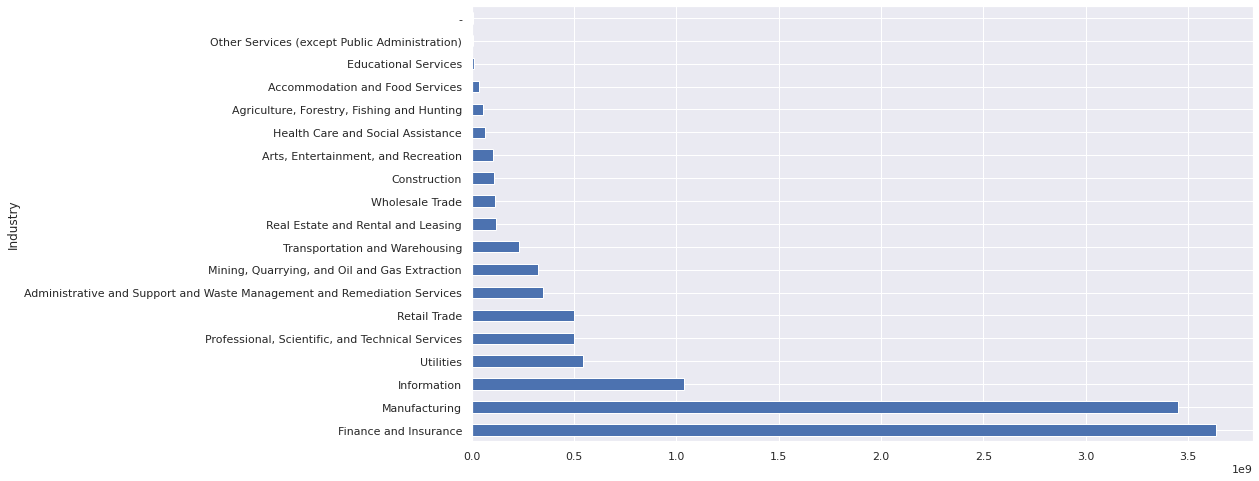

In [22]:
df_bvSorted['bookvalue'].plot(kind = 'barh')

**PLOT OF EACH TYPE OF INDUSTRY ACCORDING THE BOOK VALUE IN THE ACTIVITY AREA THAT THE INDUSTRY DOES**

***ANALYSIS:***

*ACCORDING THE PLOT ABOVE, WE CAN SEE THAT MOST OF THE DISTRIBUTION IN BOOK VALUE OF ALL THE FIRMS ARE IN THE FINANCE AND MANUFACTURING AREA, THIS COULD MEAN THAT GENERALLY THIS AREAS MANAGE GREATEST QUANTITIES TO WORK THAN THE ANOTHER AREAS.*

In [23]:
df_mv = df_rollyInd.assign(marketvalue = (df_rollyInd['originalprice']*df_rollyInd['sharesoutstanding']))
df_mvSorted = df_mv.sort_values(by=['marketvalue'], ascending = False )
df_mvSorted['marketvalue']

Industry
Manufacturing                                                               1.438814e+13
Finance and Insurance                                                       3.948950e+12
Information                                                                 1.073203e+12
Retail Trade                                                                3.717480e+11
Administrative and Support and Waste Management and Remediation Services    1.960633e+11
Professional, Scientific, and Technical Services                            1.643399e+11
Utilities                                                                   9.605831e+10
Mining, Quarrying, and Oil and Gas Extraction                               6.604297e+10
Transportation and Warehousing                                              5.661430e+10
Wholesale Trade                                                             5.617967e+10
Accommodation and Food Services                                             3.402275e+10
Construction

**MARKET VALUE OF EACH TYPE OF INDUSTRY ACCODING TO THE AREA OF ACTIVITY, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST MARKET VALUE**

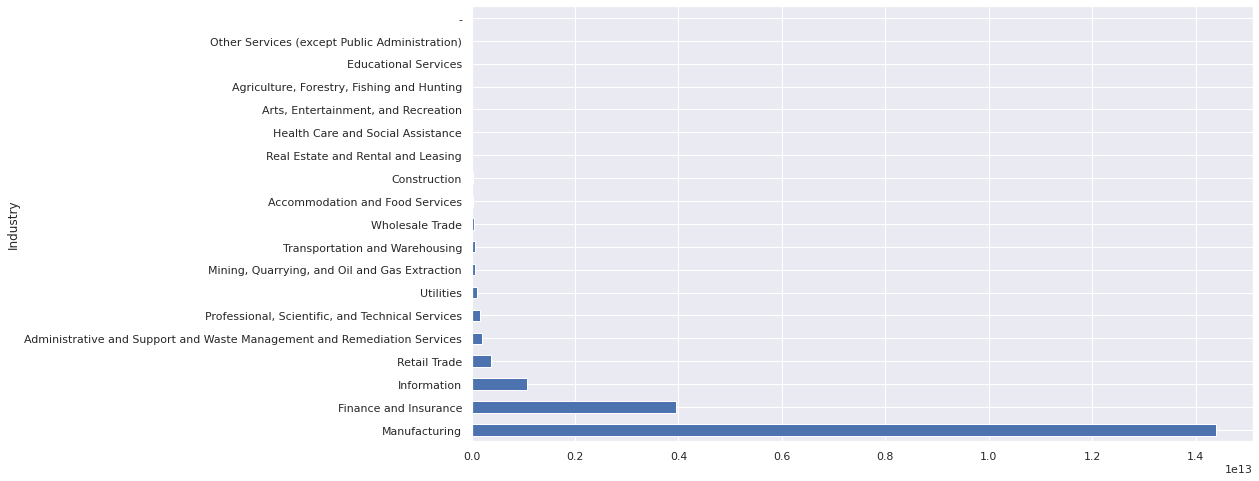

In [24]:
df_mvSorted['marketvalue'].plot(kind = 'barh')

***ANALYSIS:***

*ACCORDING THE PLOT ABOVE, WE CAN SEE THAT MOST OF THE DISTRIBUTION IN MARKET VALUE OF ALL THE FIRMS ARE IN THE FINANCE AND MANUFACTURING AREA, THIS COULD MEAN THAT THIS AREAS ARE TAKING AN IMPORTANT RELEVANCE IN THE MARKET, SPECIFICALLY THE AREA WITH MOST PROJECTION OR POSSIBILITY OF GROWTH ARE THE MANUFACTURING AREA BUT THE MARKET VALUE CAN ALSO INDICATE THE MOST QUOTED AND EXPENSIVE THAT IT CAN BE TO ACQUIRE ANY FIRM OF THIS AREA.*

In [25]:
df_bv['bookvalue'].describe()

count    1.900000e+01
mean     5.895441e+08
std      1.072939e+09
min      5.704446e+06
25%      5.908599e+07
50%      1.180439e+08
75%      5.015152e+08
max      3.635015e+09
Name: bookvalue, dtype: float64

In [26]:
df_mv['marketvalue'].describe()

count    1.900000e+01
mean     1.079552e+12
std      3.348690e+12
min      1.055899e+07
25%      1.076727e+10
50%      5.617967e+10
75%      1.802016e+11
max      1.438814e+13
Name: marketvalue, dtype: float64

***GENERAL ANALYSIS:***

*COMPARING BOTH PLOTS AND ANALYSIS ABOUT MARKET VALUE AND BOOK VALUE, IT CAN SAY THAT IN TERMS OF MARKET VALUE, ARE MOST DIFFERENCES BETWEEN EACH ONE, A FACTOR ABOUT THIS CAN BE THE POPULARITY OF JUST A FEW OF THEM BECAUSE THE PROFITABILITY, THE DEVASTATING DIFFERENCE CAN BE SEEN IN THAT ONLY 2 FIRMS EXCEED AVERAGE MARKET VALUE.*

*IN TERMS OF BOOK VALUE, THE ARGUMENT IS THE SAME BUT THE DIFFERENCES ARE OF SMALLER DISTANCE, PROBABLY SOME FIRMS OF ANOTHER AREAS HAD MORE BOOK VALUE IN THE START OF THE ROLLING YEAR BECAUSE THEIR YEARS OF OPERATION IN THE MARKET OF EE.UU.*

# For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

In [27]:
df_pm = df_rollyInd

In [28]:
df_pm = df_pm.assign(operatingprofit = (df_pm['revenue']-df_pm['cogs']-df_pm['sgae']-df_pm['otheropexp']))
df_pmTop = df_pm.sort_values(by='operatingprofit', ascending = False)
df_pmTop['operatingprofit']

Industry
Manufacturing                                                               9.637272e+08
Finance and Insurance                                                       6.962962e+08
Information                                                                 2.258868e+08
Retail Trade                                                                1.744776e+08
Professional, Scientific, and Technical Services                            1.371890e+08
Mining, Quarrying, and Oil and Gas Extraction                               1.112517e+08
Administrative and Support and Waste Management and Remediation Services    7.681538e+07
Utilities                                                                   6.477553e+07
Transportation and Warehousing                                              5.845164e+07
Accommodation and Food Services                                             3.655665e+07
Wholesale Trade                                                             3.455700e+07
Construction

**OPERATING PROFIT OF EACH TYPE OF THE INDUSTRY ACCODING TO THE AREA OF ACTIVITY, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST OPERATING PROFIT**

In [29]:
df_pm = df_pm.assign(profitmargin = (df_pm['operatingprofit']/df_pm['revenue']))
df_pmTop = df_pm.sort_values(by='profitmargin', ascending = False)
ind = df_pmTop['profitmargin'].index
df_pmTop = df_pmTop.drop(ind[0])
df_pmTop[['operatingprofit','revenue','profitmargin']]

,operatingprofit,revenue,profitmargin
Industry,,,
"Mining, Quarrying, and Oil and Gas Extraction",1.112517e+08,3.761424e+08,0.295770
Finance and Insurance,6.962962e+08,2.525071e+09,0.275753
"Professional, Scientific, and Technical Services",1.371890e+08,6.551785e+08,0.209392
Information,2.258868e+08,1.276379e+09,0.176975
Administrative and Support and Waste Management and Remediation Services,7.681538e+07,4.642928e+08,0.165446
Accommodation and Food Services,3.655665e+07,2.300591e+08,0.158901
Manufacturing,9.637272e+08,6.697402e+09,0.143896
Utilities,6.477553e+07,4.628640e+08,0.139945
Real Estate and Rental and Leasing,2.748559e+07,1.964599e+08,0.139904


**OPERATING PROFIT, REVENUES AND PROFIT MARGIN OF EACH TYPE OF INDUSTRY ACCODING TO THE AREA OF ACTIVITY, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST PROFIT MARGIN VALUE**

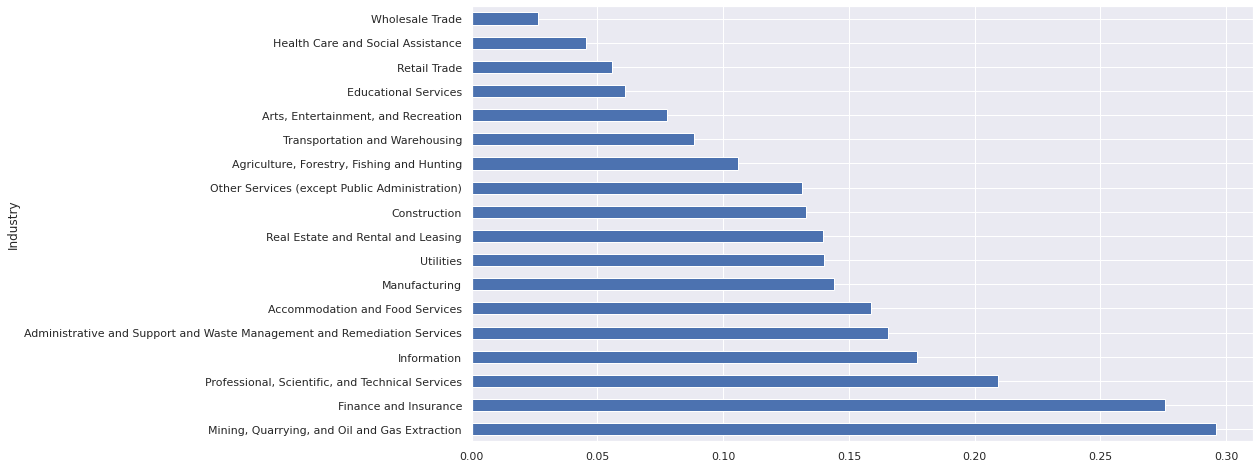

In [30]:
df_pmTop['profitmargin'].plot(kind = 'barh')

***ANALYSIS:***

*ACCORDING THE PLOT ABOVE, WE CAN SEE THAT THE PROFIT MARGIN VALUE IS CLOSE BETWEEN EACH ONE, BUT MINING INDUSTRY STAND OUT AT THE TOP OF INDUSTRY AREAS, SOMETHING THAT NOT HAPPEN IN THE PREVIOUS PLOTS, THIS MAY BE DUE TO THE PRICES THAT ARE MANAGED IN THE INDUSTRY.*

*ANOTHER CASE IS ABOUT FINANCE AND INSURANCE INDUSTRY THAT ARE IN THE TOP IN MAJOR OF THE PLOTS, THIS MEANS THE GOOD PERFORMANCE THAT CAN BE THE INDUSTRY IN THE PROFITABILITY OF THE SERVICES THAT OFFERS.*

*THE LAST CASE IS ABOUT MANUFACTURING INDUSTRY THAT DESPITE BEING IN THE TOP OF THE BOOK AND MARKET VALUES, THE PROFIT MARGIN IS NOT THE BEST, THIS MEANS THAT MOST OF THE MANUFACTURING PRODUCTS, THEY PREFER THE AMOUNT THEY SELL AND THE LITTLE PROFIT THEY GET FROM A HIGHER AMOUNT OF SALES.*

In [31]:
df_pmTop['profitmargin'].describe()

count    18.000000
mean      0.135060
std       0.073732
min       0.026437
25%       0.080367
50%       0.136342
75%       0.163810
max       0.295770
Name: profitmargin, dtype: float64

***GENERAL ANALYSIS:***

*IN RESUME, THE MOST PROFITABILITY FIRMS ARE THE MINING INDUSTRIES DUE THE PROFIT MARGIN, BUT THAT MEANS ABOUT THE ELEVATE COSTS THAT THE PRODUCTS HAVE AND THE BASE OF ALL THE ANOTHER PRODUCTS INDUSTRIES(IN THE CASE OF OIL AND GAS), BUT ANOTHER INSTEREST CASE IS ABOUT THE SERVICES INDUSTRIES, THAT SOME HAVE A HIGHER PROFIT MARGIN THAN THE AVERAGE(0.153).*

*IN THIS CASES, THE INDUSTRY WITH MINOR CHANGES ACROSS THE PLOTS IN THE LIST OF INDUSTRIES WAS FINANCE AND INSURANCE, IT MEANS THAT THE MARKET OF THE INDUSTRY IS BALANCED IN TERMS OF SALES, REVENUES AND EXPENSES*

# Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [32]:
df_rollymv = df_rolly.assign(marketvalue = (df_rolly['originalprice']*df_rolly['sharesoutstanding']))

In [33]:
df_rollmvTop = df_rollymv[['firm','marketvalue']].sort_values(by='marketvalue', ascending = False).head(10)
df_rollmvTop

,firm,marketvalue
8,AAPL,2.212838e+09
2125,MSFT,1.920840e+09
1399,GOOGL,1.435042e+09
201,AMZN,1.080624e+09
3218,TSLA,6.976698e+08
3299,UNH,4.818731e+08
1744,JNJ,4.671001e+08
2029,META,4.363946e+08
2285,NVDA,3.789750e+08
3338,V,3.743426e+08


**TOP 10 FIRMS WITH THE HIGHER MARKET VALUE, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST MARKET VALUE**

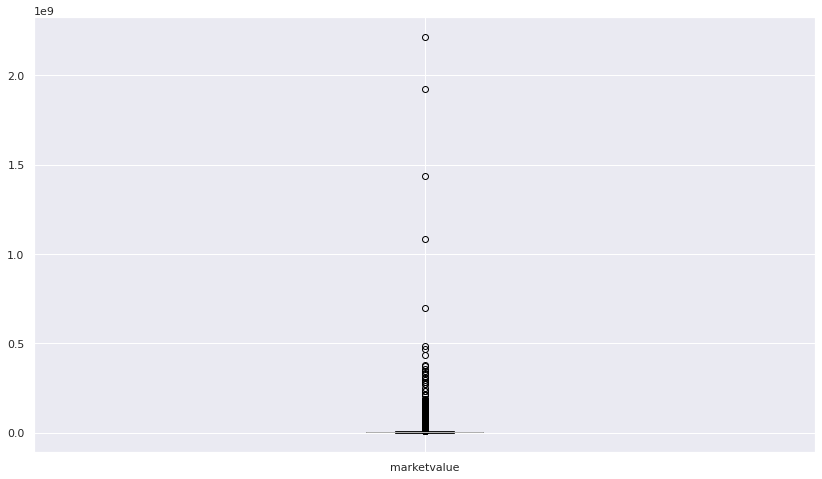

In [34]:
df_rollymv[['marketvalue']].boxplot()

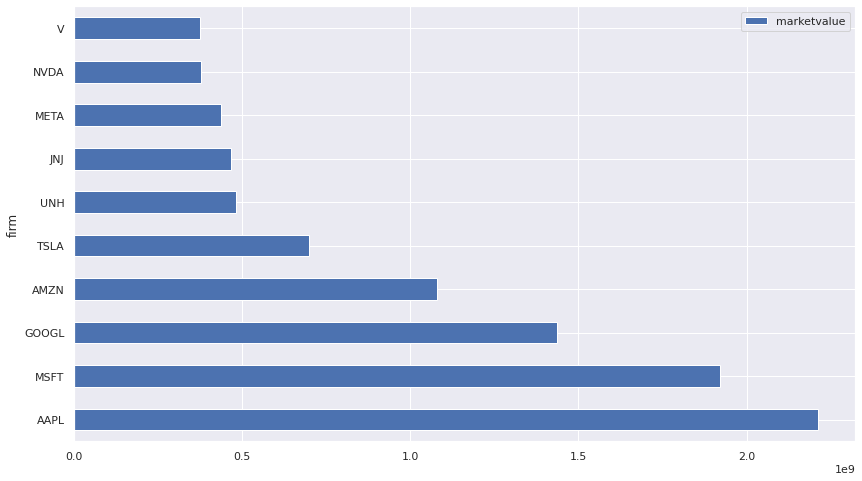

In [35]:
df_rollmvTop.plot(kind = 'barh', x = 'firm')

**TOP 10 FIRMS WITH THE HIGHER MARKET VALUE, THE INFORMATION GOES FROM THE FEWEST TO THE GREATEST MARKET VALUE**

In [36]:
df_rollymv[['marketvalue']].describe()

,marketvalue
count,3.548000e+03
mean,1.095980e+07
std,6.632062e+07
min,3.490000e+01
25%,1.907523e+05
50%,1.105076e+06
75%,4.607257e+06
max,2.212838e+09


***GENERAL ANALYSIS:***

*THE TOP 10 FIRMS ARE SO FAR IN TERMS OF MARKET VALUE OF THE ANOTHER FIRMS AND ACCORDING TO THE AVERAGE MARKET VALUE OF ALL THE FIRMS*



# Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [37]:
df_rollybv = df_rolly.assign(bookvalue = (df_rolly['totalassets']-df_rolly['totalliabilities']))

In [38]:
df_rollybvTop = df_rollybv[['firm','bookvalue']].sort_values(by='bookvalue', ascending = False).head(10)
df_rollybvTop

,firm,bookvalue
1750,JPM,286143000.0
377,BAC,269118000.0
1399,GOOGL,255419000.0
552,C,199626000.0
3550,XOM,184508000.0
3470,WFC,179793000.0
2125,MSFT,166542000.0
871,CVX,154562000.0
3086,T,135307000.0
201,AMZN,131402000.0


**TOP 10 FIRMS WITH THE HIGHER BOOK VALUE, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST BOOK VALUE**

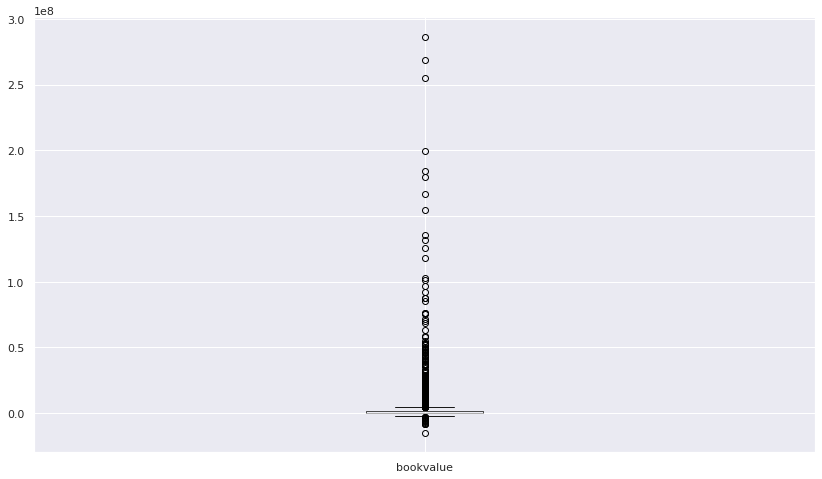

In [39]:
df_rollybv[['bookvalue']].boxplot()

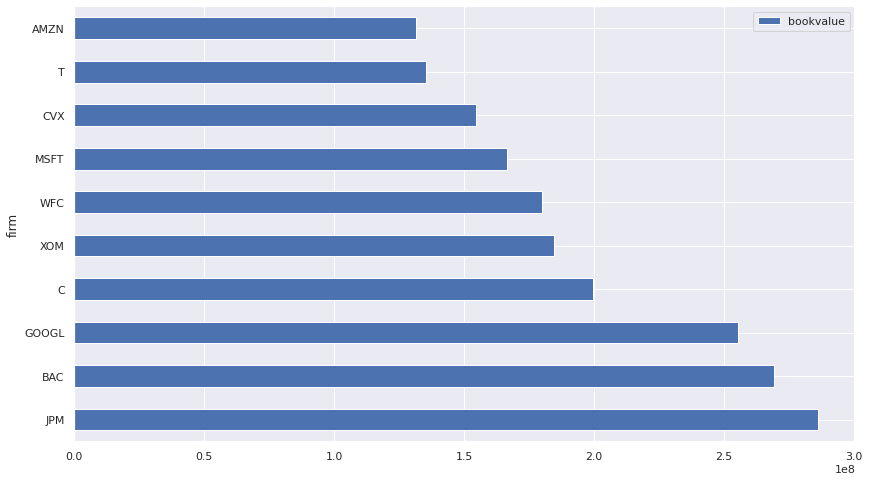

In [40]:
df_rollybvTop.plot(kind = 'barh', x = 'firm')

**TOP 10 FIRMS WITH THE HIGHER BOOK VALUE, THE INFORMATION GOES FROM THE FEWEST TO THE GREATEST BOOK VALUE**

In [41]:
df_rollybv[['bookvalue']].describe()

,bookvalue
count,3.362000e+03
mean,3.331749e+06
std,1.386098e+07
min,-1.479100e+07
25%,1.060878e+05
50%,4.577370e+05
75%,1.792766e+06
max,2.861430e+08


***GENERAL ANALYSIS:***

*THE TOP 10 FIRMS ARE SO FAR IN TERMS OF BOOK VALUE OF THE ANOTHER FIRMS AND ACCORDING TO THE AVERAGE BOOK VALUE OF ALL THE FIRMS, EVEN EXIST SOME FIRMS IN THE TOP THAT ARE HIGHER OF ANOTHER TOP FIRMS*

# How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics

1  
  
    Rentabilidad de una empresa = ROA (Retorno sobre activos)
    
    Beneficios netos/Activos totales
        
    netincome/total assets

In [42]:
df_profitability = df_rolly.assign(ebit = (df_rolly['revenue']-df_rolly['cogs']-df_rolly['sgae']-df_rolly['otheropexp']))
df_profitability = df_profitability.assign(netincome = (df_profitability['ebit']-df_profitability['incometax']-df_profitability['finexp']))
df_profitability = df_profitability.assign(ROA = (df_profitability['netincome']/df_profitability['totalassets']))
df_profitability[['firm','ROA','netincome','totalassets']].sort_values(by='ROA', ascending = False).head(10)

,firm,ROA,netincome,totalassets
499,BPT,7.259574,4.360100e+04,6.006000e+03
2448,PBT,3.038415,1.731693e+04,5.699330e+03
803,CRT,1.607074,9.208422e+03,5.729929e+03
3479,WINA,1.498882,4.055120e+04,2.705430e+04
2255,NRT,0.952654,3.559968e+03,3.736895e+03
1921,LPX,0.546525,1.392000e+06,2.547000e+06
2114,MRNA,0.541335,1.409800e+07,2.604300e+07
504,BRDG,0.480863,5.010920e+05,1.042068e+06
2021,MED,0.460423,1.567970e+05,3.405500e+05
3412,VRSN,0.459198,8.093360e+05,1.762500e+06


**ROA, NET INCOME AND TOTAL ASSETS OF THE TOP 10 FIRMS WITH THE HIGHEST ROA VALUE, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST ROA VALUE**

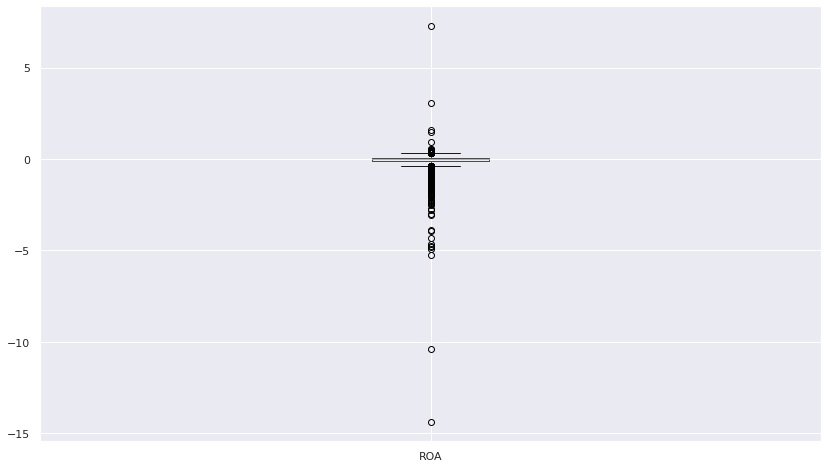

In [43]:
df_profitability[['ROA']].boxplot()

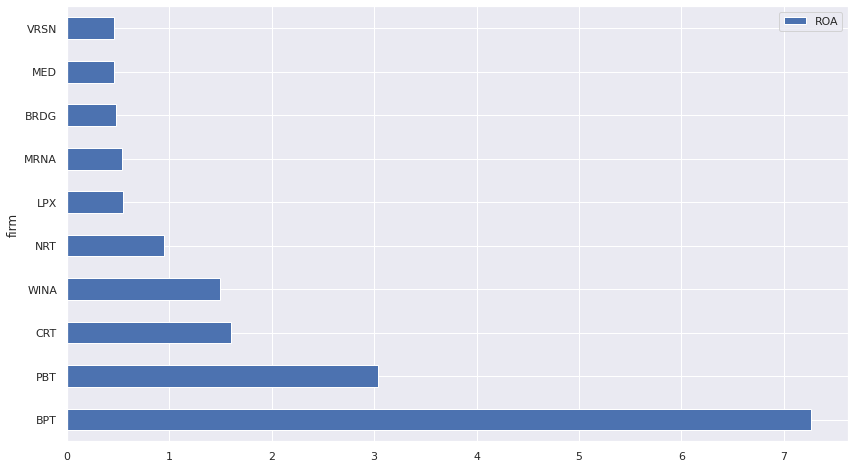

In [44]:
df_profitability[['firm','ROA']].sort_values(by='ROA', ascending = False).head(10).plot(kind='barh', x='firm')

**TOP 10 FIRMS WITH THE HIGHEST ROA, THE INFORMATION GOES FROM THE FEWEST TO THE GREATEST ROA**

In [45]:
df_profitability[['ROA']].describe()

,ROA
count,3362.000000
mean,-0.106452
std,0.523654
min,-14.351967
25%,-0.118418
50%,0.019610
75%,0.059463
max,7.259574


***GENERAL ANALYSIS:***

*THE MOST IMPORTANT RATIO OF PROFITABILITY FOR THE FIRMS IS THE ROA, THE RETURN OF ASSETS INDICATES HOW EFFICENTLY A COMPANY USE THE ASSETS TO GENERATE PROFITS, ACCORDING TO THE BOXPLOT, A LITTLE FEW FIRMS GOT A POSITIVE ROA, ALL THE TOP 10 HAVE AN ACCEPTABLE ROA, FOR NOW, THIS IS A GOOD INDICATOR OF PROFITABILITY BETWWEN THE FIRMS.*


2  
  
    Rentabilidad de una empresa = Profit margin
    
    Measure of profitability
        
    profit margin = Ebit/revenues

In [46]:
df_profitability = df_profitability.assign(profitmargin = (df_profitability['ebit']/df_profitability['revenue']))
df_pmargin = df_profitability[['firm','ebit','revenue','profitmargin']].sort_values(by='profitmargin', ascending = False)
ind_pm = df_pmargin['profitmargin'].index
df_pmTop = df_pmargin.drop(ind_pm[0:5]).head(10)
df_pmTop

,firm,ebit,revenue,profitmargin
3045,STRS,7.390700e+04,1.636900e+04,4.515059
2863,SESN,3.523900e+04,2.000000e+04,1.761950
2251,NREF,7.333800e+04,4.628200e+04,1.584590
875,CWEN,1.501000e+06,1.251000e+06,1.199840
1720,IVR,1.778690e+05,1.727670e+05,1.029531
459,BKSC,1.723252e+04,1.738430e+04,0.991269
2864,SF,4.673816e+06,4.717987e+06,0.990638
2895,SI,1.969100e+05,1.988430e+05,0.990279
3445,WABC,1.766480e+05,1.786070e+05,0.989032
853,CVBF,4.404740e+05,4.454400e+05,0.988851


**EBIT, REVENUES AND PROFIT MARGIN OF THE TOP 10 FIRMS WITH THE HIGHEST ROA VALUE, THE INFORMATION GOES FROM THE GREATEST TO THE FEWEST ROA VALUE**

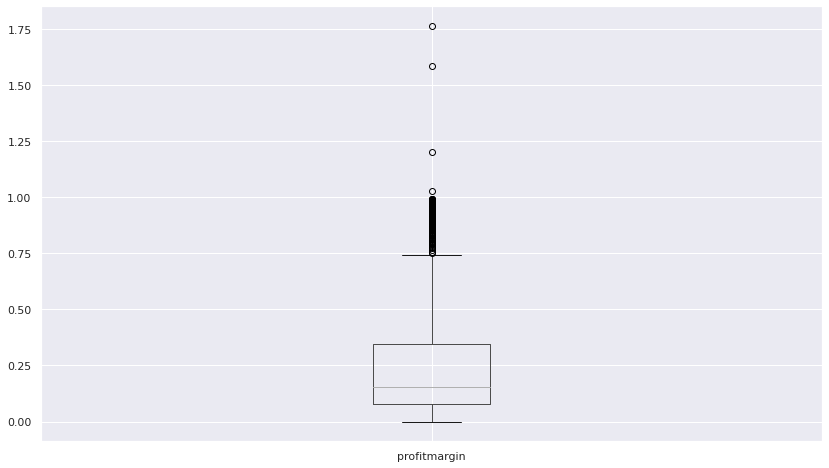

In [47]:
df_pmbox = df_pmargin.query("profitmargin >= 0 and profitmargin <= 2")
df_pmbox[['profitmargin']].boxplot()

In [48]:
df_pmbox[['profitmargin']].describe()

,profitmargin
count,2237.000000
mean,0.282469
std,0.303550
min,0.000060
25%,0.076125
50%,0.153570
75%,0.343672
max,1.761950


***GENERAL ANALYSIS:***

*PROFIT MARGIN IS A RATIO OF PROFITABILITY, PROFIT MARGIN INDICATES THE PERCENTAGE TO WHICH A FIRMS MAKES MONEY WITH THE REVENUES, ACCORDING TO THE BOXPLOT, A LITTLE FEW HAVE A GOOD PROFIT MARGIN, MOST OF THEY ARE NEAR TO THE ZERO, BUT ALL THE TOP 10 HAVE AN ACCEPTABLE PROFIT MARGIN AND HIGHER THAN THE AVERAGE PROFIT MARGIN, A DISAVANTAGE IS SOME MISSING DATA FROM SOME FIRMS, THAT GENERATES OUTLIERS WITH THE PROFIT MARGIN, EVEN SO THIS IS A GOOD PROFITABILITY INDICATOR.*

3  
  
    Rentabilidad de una empresa = book-to-market ratio
    
    Book value/market value

In [49]:
df_profitability = df_profitability.assign(bookvalue = (df_rollybv[['bookvalue']]))
df_profitability = df_profitability.assign(marketvalue = (df_rollymv[['marketvalue']]))
df_profitability = df_profitability.assign(booktomarket = (df_profitability['bookvalue']/df_profitability['marketvalue']))

In [50]:
df_btmUpdated = df_profitability

In [51]:
df_btmUpdated = df_btmUpdated.query("booktomarket > 0 and booktomarket < 2")
df_btmUpdated[['firm','booktomarket']].sort_values(by='booktomarket', ascending = True).head(10)

,firm,booktomarket
2136,MTD,0.000281
2448,PBT,0.000423
2711,RHP,0.001486
1959,LYV,0.001858
3484,WK,0.002285
1301,FTDR,0.003029
2890,SHLS,0.003063
675,CHWY,0.004013
2428,PANW,0.006860
3119,TEAM,0.007109


**BOOK VALUE, MARKE TVALUE AND BOOT-TO-MARKET OF THE TOP 10 FIRMS WITH THE BEST B-TO-M VALUE, THE INFORMATION GOES FROM THE FEWEST AND NEARLY TO 0 TO THE GREATEST B-TO-M VALUE**

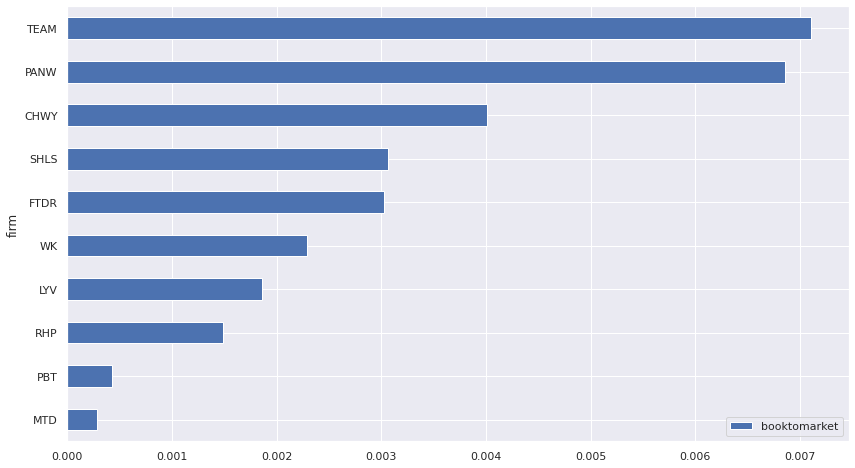

In [52]:
df_btmUpdated[['firm','booktomarket']].sort_values(by='booktomarket', ascending = True).head(10).plot(kind = 'barh', x = 'firm')

In [53]:
df_btmUpdated[['booktomarket']].describe()

,booktomarket
count,3020.000000
mean,0.619826
std,0.428796
min,0.000281
25%,0.284019
50%,0.532359
75%,0.875095
max,1.996012


***GENERAL ANALYSIS:***

*THE BOOK TO MARKET RATIO INDICATES IF A FIRM HAVE A EXPENSIVE STOCK OR A CHEAP STOCK ACCORDING TO THE VALUE OF THE RATIO, THE TOP 10 HAVE AN INDICATORS OF A BAD INVESTMENT OR A STOCK UNDERVALUED, IF THE BOOK TO MARKET RATIO IS HIGHER IT IS A INDICATOR FOR A OVERVALUED STOCK, EVEN SO THIS IS A GOOD OF PROFITABILITY INDICATOR FOR INVESTORS, TO SEE FIRMS WITH A GOOD PERFORMANCE OR GOOD POTENTIAL THE HIGHEST B-TO-M RATIO WILL INDICATE IT.*

# Calculate and explain earnings per share deflated by price.

In [54]:
df_eps = df_profitability.assign(eps = (df_profitability['netincome']/df_profitability['sharesoutstanding']))

In [55]:
df_epsTop = df_eps[['firm','netincome','sharesoutstanding','eps']].sort_values(by='eps', ascending = False)
ind_eps = df_epsTop['eps'].index
df_epsTop = df_epsTop.drop(ind_eps[0])
df_epsTop.head(10)

,firm,netincome,sharesoutstanding,eps
2851,SEB,5.450000e+05,1160.779,469.512284
2291,NVR,1.374138e+06,3289.666,417.713531
1195,FCNCA,1.952900e+06,16001.599,122.044053
1399,GOOGL,6.906500e+07,658499.877,104.882328
3508,WRLD,5.677851e+05,6278.324,90.435780
371,AZO,1.619561e+06,19487.599,83.107262
457,BKNG,3.203000e+06,40623.256,78.846462
251,ARCH,1.012538e+06,15477.360,65.420589
556,CACC,8.299000e+05,13139.579,63.160319
747,COF,2.293000e+07,383817.721,59.741900


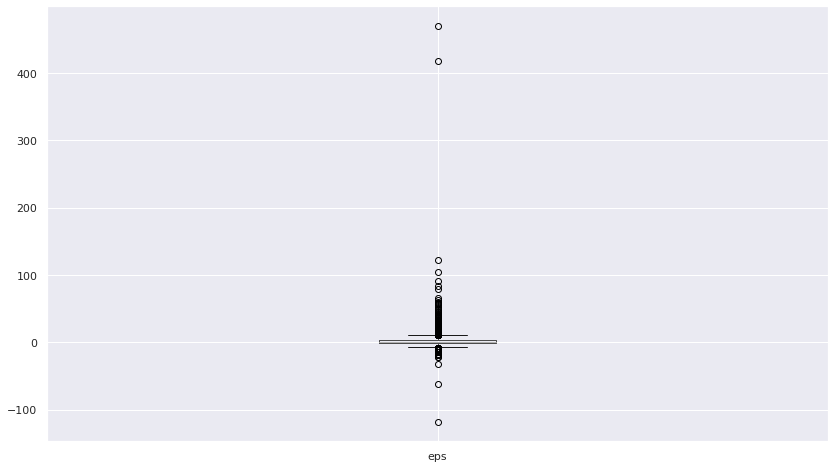

In [56]:
df_epsTop[['eps']].boxplot()

***GENERAL ANALYSIS:***

*THE EARNING PER SHARE REPRESENTS STADISTICALLY THE VALUE OF THE EARNINGS OF THE FIRMS ACCORDING EACH SHARE IN THE FIRMS, IT IS A INDICATOR FOR PROFITABILITY OF FIRMS, THIS INDICATOR CAN SHOW THE PERFORMANCE WITH THE TOTAL OF EARNINGS(NET INCOME).*

# **PARTE 2: MODELO ESTADÍSTICO**

# Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns

In [57]:
df_predict = df.merge(df_firms, on='firm')

In [58]:
df_predict = df_predict.query("Industry == 'Manufacturing'")

Do histograms for each factor/variables and interpret them

***ROA***

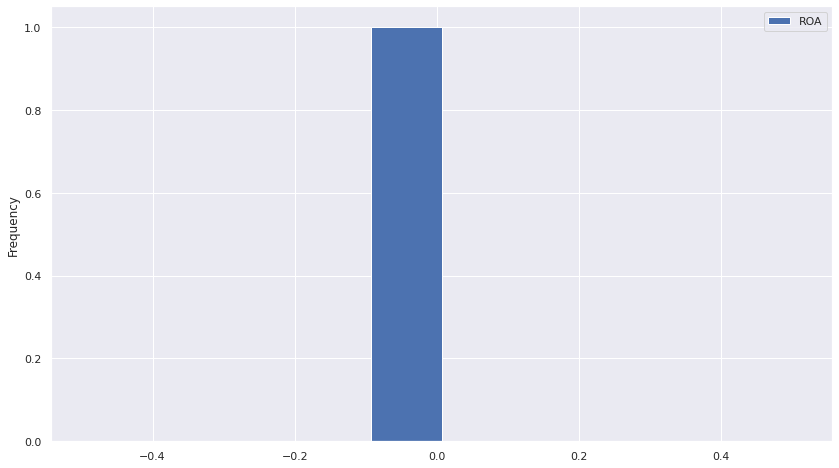

In [112]:
df_predict = df_predict.assign(ebit = (df_predict['revenue']-df_predict['cogs']-df_predict['sgae']-df_predict['otheropexp']))
df_predict = df_predict.assign(netincome = (df_predict['ebit']-df_predict['incometax']-df_predict['finexp']))
df_predict = df_predict.assign(ROA = (df_predict['netincome']/df_predict['totalassets']))
df_predict_roa = df_predict.groupby('Industry')['ROA'].median().to_frame()
df_predict_roa.plot(kind = 'hist')

In [113]:
df_predict_roa.describe()

,ROA
count,1.00000
mean,0.00702
std,NaN
min,0.00702
25%,0.00702
50%,0.00702
75%,0.00702
max,0.00702


***PROFIT MARGIN***

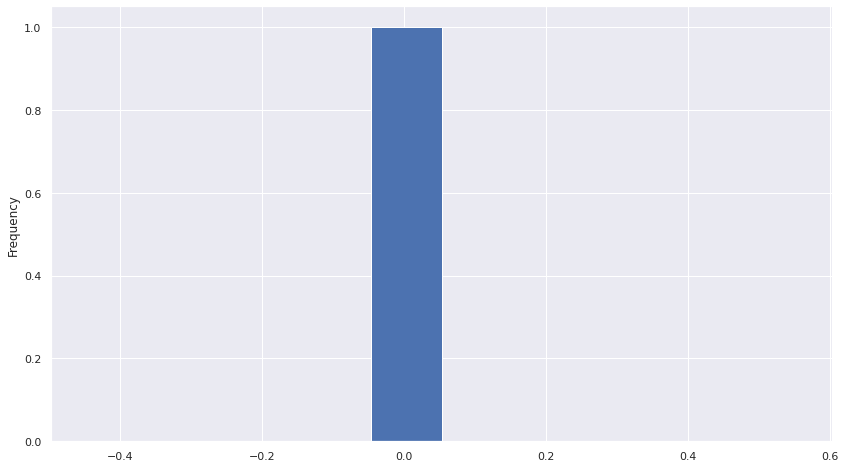

In [114]:
df_predict = df_predict.assign(profitmargin = (df_predict['ebit']/df_predict['revenue']))
df_predict.replace([np.inf, -np.inf], 0, inplace=True)
df_predict_pm = df_predict.groupby('Industry')['profitmargin'].median()
df_predict_pm.plot(kind = 'hist')

In [115]:
df_predict_pm.describe()

count    1.00000
mean     0.05302
std          NaN
min      0.05302
25%      0.05302
50%      0.05302
75%      0.05302
max      0.05302
Name: profitmargin, dtype: float64

***BOOK TO MARKET RATIO***

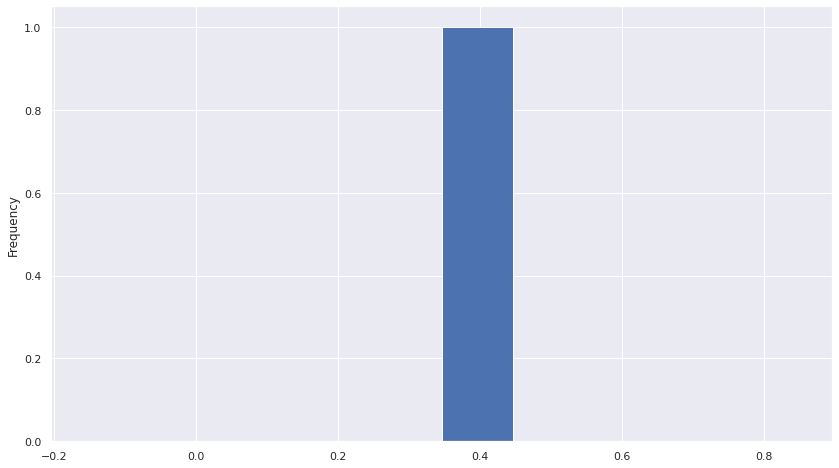

In [116]:
df_predict = df_predict.assign(marketvalue = (df_predict['originalprice']*df_predict['sharesoutstanding']))
df_predict = df_predict.assign(bookvalue = (df_predict['totalassets']-df_predict['totalliabilities']))
df_predict = df_predict.assign(booktomarket = (df_predict['bookvalue']/df_predict['marketvalue']))

df_predict_btm = df_predict.groupby('Industry')['booktomarket'].median()
df_predict_btm.plot(kind = 'hist')

In [117]:
df_predict_btm.describe()

count    1.000000
mean     0.345824
std           NaN
min      0.345824
25%      0.345824
50%      0.345824
75%      0.345824
max      0.345824
Name: booktomarket, dtype: float64

In [140]:
df_predict = df_predict.assign(eps = (df_predict['netincome']/df_predict['sharesoutstanding']))

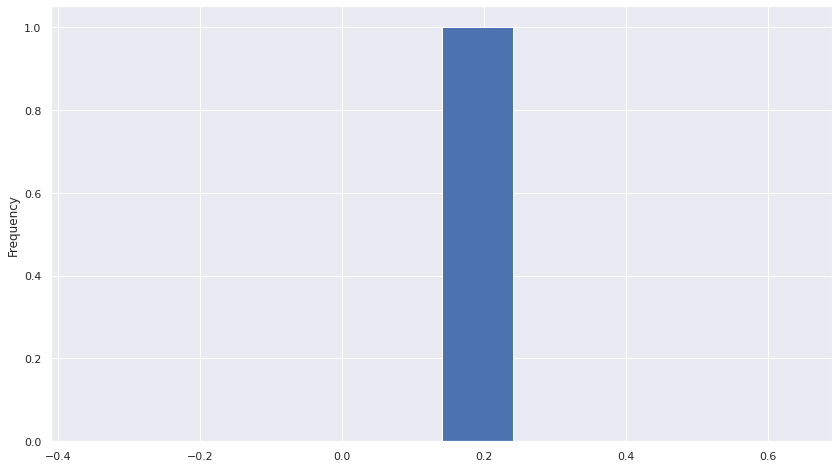

In [141]:
df_predict_eps = df_predict.groupby('Industry')['eps'].median()
df_predict_eps.plot(kind = 'hist')

Do plots to visualize the possible relationship each factor might have with the dependent variable.

Show descriptive statistics of these factors

# Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model



*Multiple regression model*

**dataset: hitorial panel data of your industry firms**

**dependent variable: annual stock return (cc) 1 quarter in the future**

**independent variables ESPS, size + the 3 factors**

**control variables: ESPS, size**

In [118]:
df_predict = df_predict.sort_values(by=['q','marketvalue'], ascending = True)

In [119]:
df_predict['size'] = df_predict.groupby(['q'])['marketvalue'].transform(lambda x: pd.qcut(x,3,labels = ["small", "medium", "big"]))

In [120]:
df_predict[['size']].value_counts(sort = True)

size  
small     20472
big       20443
medium    20407
dtype: int64

In [121]:
df_predictD = df_predict
df_predict

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Sector NAICS\nlast available,partind,ebit,netincome,ROA,profitmargin,marketvalue,bookvalue,booktomarket,size
126212,GPK,2000q1,270229.0,211928.0,31465.0,2740.0,1411.0,45599.0,1071.0,2341399.0,...,Converted Paper Product Manufacturing,-,24096.0,-22574.0,-0.009641,0.089169,31194.817500,252685.0,8.100224,small
82653,DECK,2000q1,41466.0,22084.0,11318.0,0.0,-171.0,201.0,3308.0,85052.0,...,Footwear Manufacturing,-,8064.0,4555.0,0.053555,0.194473,36260.020000,61320.0,1.691119,small
184336,MIDD,2000q1,32474.0,21260.0,8570.0,0.0,-286.0,477.0,1391.0,94794.0,...,"Ventilation, Heating, Air-Conditioning, and Co...",-,2644.0,776.0,0.008186,0.081419,57959.725687,44126.0,0.761322,small
154188,ITRI,2000q1,47658.0,29582.0,16277.0,-185.0,1895.0,1567.0,480.0,187624.0,...,"Navigational, Measuring, Electromedical, and C...",-,1984.0,-63.0,-0.000336,0.041630,104324.210250,49650.0,0.475920,small
136202,HOLX,2000q1,23252.0,13524.0,14094.0,0.0,-44.0,-1026.0,-1200.0,172003.0,...,"Navigational, Measuring, Electromedical, and C...",0.049,-4366.0,-2140.0,-0.012442,-0.187769,121970.704750,145375.0,1.191885,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248671,RQI,2022q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Other Miscellaneous Manufacturing,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299245,UTF,2022q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Other Miscellaneous Manufacturing,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299335,UTG,2022q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Other Miscellaneous Manufacturing,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309055,VVR,2022q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Other Miscellaneous Manufacturing,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
x = ["size","ROA"]

In [123]:
model = sm.OLS((df_predict['revenue'].shift(-1)), sm.add_constant(pd.get_dummies(df_predict[x], drop_first = True)), missing = "drop").fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [124]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     2437.
Date:                Thu, 08 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:51:14   Log-Likelihood:            -1.0195e+06
No. Observations:               60407   AIC:                         2.039e+06
Df Residuals:                   60403   BIC:                         2.039e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.252e+04   3.64e+04      2.540      

In [125]:
x2 = ["size","profitmargin"]

In [126]:
model2 = sm.OLS((df_predict['revenue'].shift(-1)), sm.add_constant(pd.get_dummies(df_predict[x2], drop_first = True)), missing = "drop").fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [127]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     2437.
Date:                Thu, 08 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:51:16   Log-Likelihood:            -1.0195e+06
No. Observations:               60406   AIC:                         2.039e+06
Df Residuals:                   60402   BIC:                         2.039e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9.353e+04   3.64e+04      2.571   

In [128]:
x3 = ["size","booktomarket"]

In [129]:
model3 = sm.OLS((df_predict['revenue'].shift(-1)), sm.add_constant(pd.get_dummies(df_predict[x3], drop_first = True)), missing = "drop").fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [130]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     2447.
Date:                Thu, 08 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:51:18   Log-Likelihood:            -1.0201e+06
No. Observations:               60436   AIC:                         2.040e+06
Df Residuals:                   60432   BIC:                         2.040e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9.057e+04   3.65e+04      2.479   

In [142]:
x4 = ["size","eps"]

In [143]:
model4 = sm.OLS((df_predict['revenue'].shift(-1)), sm.add_constant(pd.get_dummies(df_predict[x4], drop_first = True)), missing = "drop").fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [144]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     2427.
Date:                Thu, 08 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:59:17   Log-Likelihood:            -1.0161e+06
No. Observations:               60197   AIC:                         2.032e+06
Df Residuals:                   60193   BIC:                         2.032e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.022e+04   3.66e+04      2.464      

In [147]:
Rs = 0.108

Your independent variables must be in the right scale so that you can compare the values of the variables among different firms of any size

For each independent variable you have to check for outliers and do the corresponding adjustments to avoid unreliable results in your regression model

You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

In [149]:
VIF = 1/(1-Rs)
VIF

1.1210762331838564

# Interpret your model

Interpret the results of each coefficient (beta and their statistical significance)

Interpret the R-squared of the model

# Adjustments to your model. If there is one or more independent variables (factors or control variables) that were not significant, drop them from your model. You have to run and interpret your final model.